# Univariate Linear Regression

In [ ]:
import numpy as np
import matplotlib as mpl
mpl.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import random
import math

### Load dataset

### Random Data Points

In [ ]:
X = np.random.randint(5,100, size=50)
y = np.random.randint(5,100, size=50)

### Organised Data Points

In [ ]:
X = np.random.randint(5,100,size=50)
y = X*np.pi/4 + X*np.pi/5

In [ ]:
y

## Dividing training and testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preparing for plotting

In [ ]:
x = np.arange(0,100,1) 
y = np.zeros((100,))

fig, ax = plt.subplots(2,figsize=(5,5))
ax[0].set(xlim=(0,100), ylim=(0,100))
#ax[1].set(xlim=(0,100), ylim=(0,100))

line = ax[0].plot(x, y, color='blue', lw=2)[0]
ax[0].scatter(X_train, y_train,c='r')


In [ ]:
m = random.uniform(0,np.pi)
c = random.uniform(0,50) 


## Gradient Descent Function

* This function will take in **alpha**,training xs(X_train) and ys(y_train)
* This function will return new **m** and **c** for every iteration over the entire training set
* The greater the number of iterations the better the fitting

In [ ]:
def GradientDescent(alpha, X_train, y_train) : 
    global m
    global c
    #Summation of derivative of Cost Function wrt c
    sum_for_c = 0
    #Summation of derivative of Cost Function wrt m
    sum_for_m = 0
    ratio = alpha/len(X_train)
    #Iterating over the entire training set
    for x,y in zip(X_train,y_train) : 
        #ratio is multiplied by derivative of CF wrt c
        sum_for_c = sum_for_c + ratio*(m*x + c - y)
        #ratio is multiplied by derivative of CF wrt m
        sum_for_m = sum_for_m + ratio*(m*x + c - y)*x
    
    #Now we set the new value of c and m as : 
    c = c - sum_for_c
    m = m - sum_for_m
    return m,c

## Gradient Descent on X_train and y_train
+ Data is simple set of (x,y) points where x is independent variable and y is dependent variable
+ Hypothesis Function is h(x) = mx + c
+ Cost function is : (1/2*len(X_train))*Summation(h(x)-y)^2
+ Cost Function is a function of m and c
+ Summation is over all the training examples
+ Cost funciton is a squared error function
+ We have to minimize the cost function
+ Updation of value : 
+ m = m - alpha*derivativeOfCostFunction
+ c = c - alpha*derivativeofCostFunction
+ The above two steps will be carried uptil there is very slight change in value of m or c or uptil certain steps
+ Above algorithm is called Gradient Descent
+ The number of times this animate function is called is the number of times GD will run and that is the number of steps


## Cost Function

In [ ]:
def CostFunction(m, c, X_train, y_train) : 
    ratio = (1/2)*((len(X_train)))
    summation = 0
    for x,y in zip(X_train, y_train) : 
        summation = summation + (m*x + c - y)**2
    return summation/len(X_train)



In [ ]:
%matplotlib inline

In [ ]:
def animate(i,m,c) : 
    alpha = 0.0001
    m,c = GradientDescent(alpha, X_train, y_train)
    line.set_ydata([m*x_i + c for x_i in x])
    cf = CostFunction(m, c, X_train, y_train)
    plt.title(f'Iteration #{i} || Cost Function Value : {cf}')
    plt.xlabel('X value')
    plt.ylabel('Y value')        

anim = animation.FuncAnimation(fig, animate, fargs=(m,c), interval = 100)

#anim.save('/home/choubeyji/Desktop/a.gif',writer='imagemagick', fps=60)
from IPython.display import HTML
from matplotlib import rc, rcParams
rc('animation', html='html5')
rcParams['animation.writer'] = 'imagemagick'

#plt.show()
HTML(anim.to_html5_video())


In [ ]:
def anim3d(i,m,c) :
    alpha = 0.0001
    m,c = GradientDescent(alpha, X_train, y_train)

anim = animation.FuncAnimation(fig, anim3d, fargs=(m,c), interval = 100)


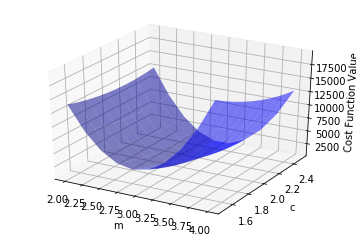

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import collections
from sklearn.model_selection import train_test_split


def error(m, b, points):
    #totalError = 0
    #for i in range(0, len(points)):
    #    totalError += (points[i].y - (m * points[i].x + b)) ** 2
    #return totalError / float(len(points))
    ratio = (1/2)*((len(points)))
    summation = 0
    for i in range(len(points)) :  
        summation = summation + (m*points[i].x + b - points[i].y)**2
    return summation*ratio

X = np.random.randint(-3.0, 3.0, 120)
y = np.random.randint(-3.0, 3.0, 120)
x, X_test, y, y_test = train_test_split(X,y)
x = np.asarray(x)
y = np.asarray(y)
Point = collections.namedtuple('Point', ['x', 'y'])

m, b = 3, 2
noise = np.random.random(x.size)
points = [Point(xp, m*xp+b+err) for xp,err in zip(x, noise)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ms = np.linspace(2.0, 4.0, 10)
bs = np.linspace(1.5, 2.5, 10)

M, B = np.meshgrid(ms, bs)
zs = np.array([error(mp, bp, points) 
               for mp, bp in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.set_xlabel('m')
ax.set_ylabel('c')

ax.set_zlabel('Cost Function Value')

plt.show()


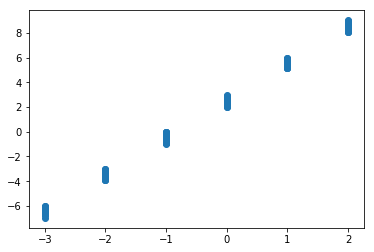

In [12]:
x = []
y = []
for i in range(len(points)) : 
    x.append(points[i].x)
    y.append(points[i].y)
plt.scatter(x,y)
plt.show()